In [1]:
# IMPORTING THE DATASETS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
con_df = pd.read_csv("C:\\Users\\PUNEET SINGH\\Concrete_Data.csv")
con_df.shape

(1030, 9)

In [3]:
con_df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# SUMMARY OF THE DATA
con_df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
Blast               1030 non-null float64
Fly Ash             1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
CA                  1030 non-null float64
FA                  1030 non-null float64
Age                 1030 non-null int64
CMS                 1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# CHECKING FOR ANY NULL VALUES
con_df.isna().sum().any()

False

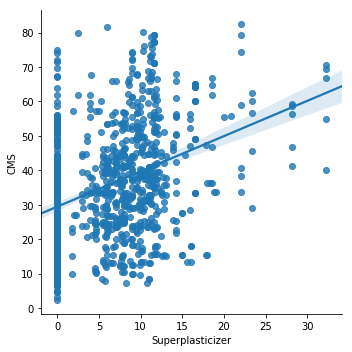

In [7]:
sns.lmplot(x='Superplasticizer',y='CMS',data=con_df)


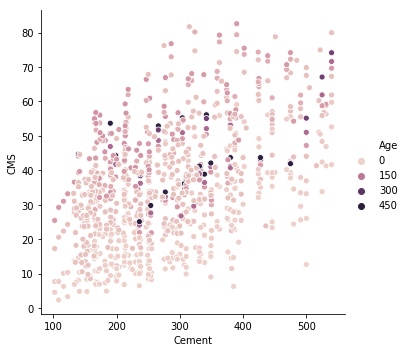

In [8]:
sns.relplot(x='Cement',y='CMS',hue='Age',data=con_df)

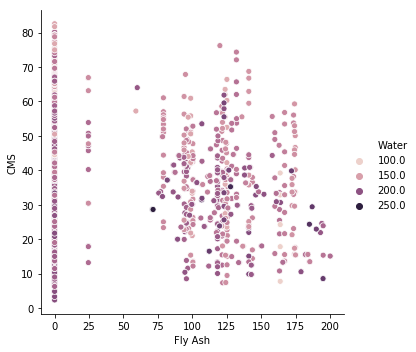

In [9]:
sns.relplot(x='Fly Ash',y='CMS',hue='Water',data=con_df)

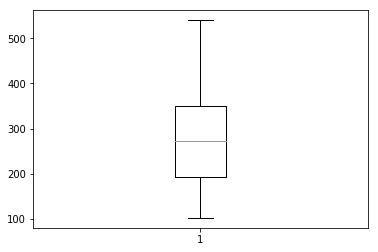

In [10]:
# CHECKING FOR OUTLIERS THROUGH BOXPLOT
plt.boxplot(con_df['Cement'])
plt.show()

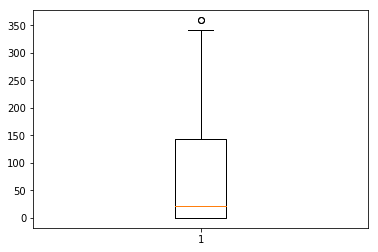

In [11]:
plt.boxplot(con_df['Blast'])
plt.show()

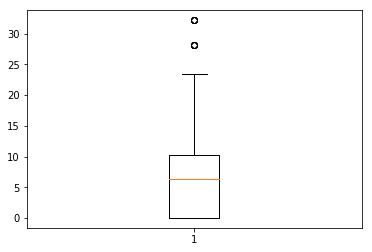

In [12]:
plt.boxplot(con_df['Superplasticizer'])
plt.show()

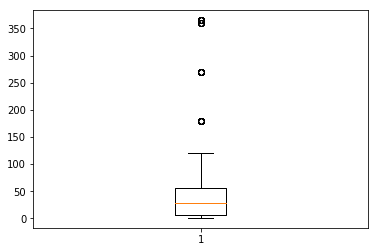

In [13]:
plt.boxplot(con_df['Age'])
plt.show()

In [14]:
# CALCULATING THE OUTLIERS THROUGH ZSCORE AND REMOVING THEM
# IMPORTING THE LIBRARY
from scipy.stats import zscore
z = np.abs(zscore(con_df))

In [15]:
threshold = 3
np.where(z>3)

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
         35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
        122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
        620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64),
 array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 3, 3], dtype=int64))

In [16]:
cc = con_df[(z<3).all(axis=1)]

In [17]:
cc.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85


In [18]:
print(cc.shape)
# OUTIERS HAVE BEEN REMOVED

(981, 9)


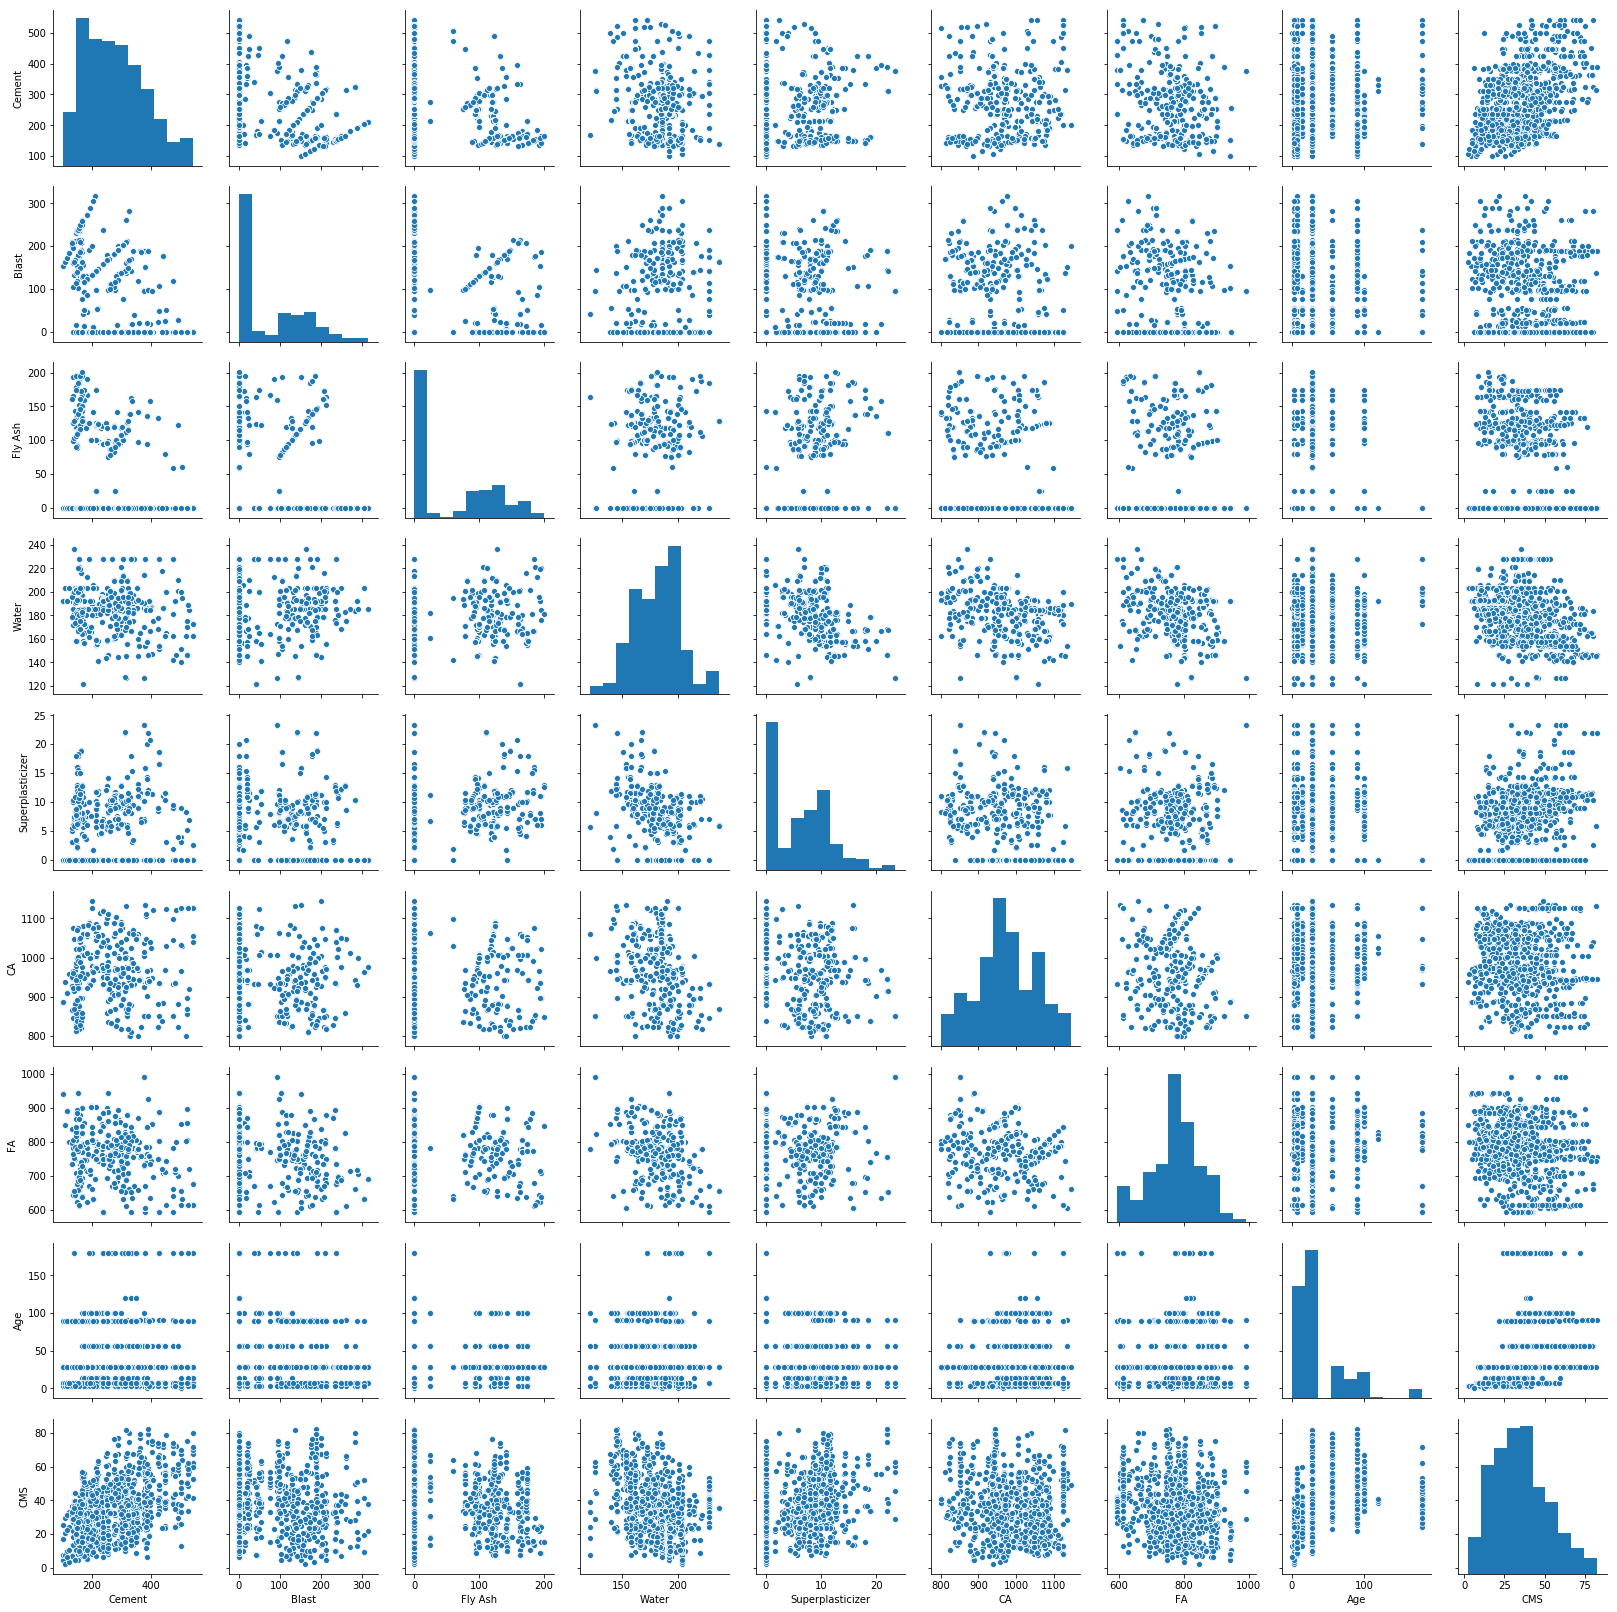

In [19]:
sns.pairplot(cc)

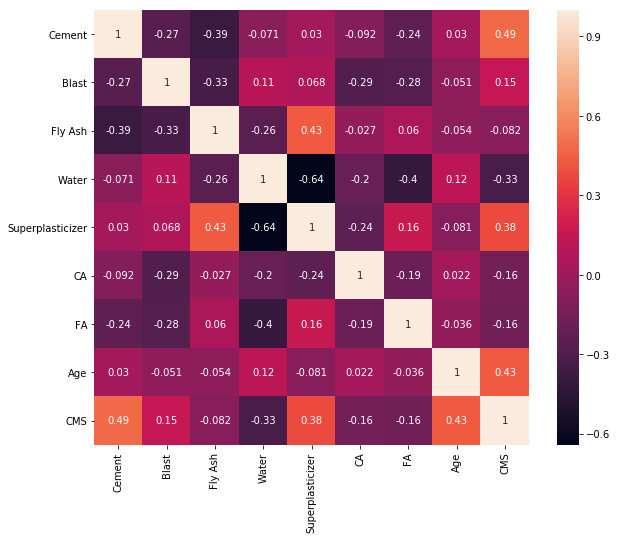

In [20]:
f,ax = plt.subplots(figsize=(10,8))
corr = cc.corr()
sns.heatmap(corr,annot=True,square=True)

In [21]:
#  DIVIDING THE DATA INTO INDEPENDENT AND DEPENDENT VARIABLES
x = cc.iloc[:,0:8].values
y = cc.iloc[:,8].values

In [22]:
# SPLITTING THE DATASET INTO TRAIN AND TEST DATASET
# IMPORTING THE LIBRARY
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=47)

In [24]:
# feature scaling 
# Importing the library
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [25]:
x_train = sc_x.fit_transform(x_train)

In [26]:
x_test = sc_x.transform(x_test)

In [27]:
# MODELS FOR THE DATA PREDICTION 
# IMPORTING THE LIBRARY
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [28]:
############# MULTILPLE LINEAR REGRESSION
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100

70.10520865425825

In [29]:
y_pred = lr.predict(x_test)
print(lr.coef_)
lr.intercept_

[12.07307272  8.92763114  5.20989255 -2.87418456  2.07178592  0.95428069
  1.27073753  8.43974711]


35.36210884353744

In [30]:
# CHECKING THE ACCURACY OF THE PREDICTION MADE BY THE MODEL
# IMPORTING THE METRICS
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [31]:
error = mean_absolute_error(y_pred,y_test)
error

6.628634970131476

In [32]:
sq_error = mean_squared_error(y_pred,y_test)
sq_error

74.9225464310768

In [33]:
score = r2_score(y_pred,y_test)
score

0.5804863564816232

In [34]:
# DECISION TREE ALGORITHM 
dtc = DecisionTreeRegressor(max_depth=5,random_state=47)

In [35]:
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)*100

80.65294843169491

In [36]:
pred = dtc.predict(x_test)

In [37]:
err  = mean_absolute_error(pred,y_test)
err

6.166729065019991

In [38]:
sq_err = mean_squared_error(pred,y_test)
sq_err

68.80042804211247

In [39]:
score = r2_score(pred,y_test)
score

0.670112144748666

In [40]:
# KNN MODEDL
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=47)
knn = KNeighborsRegressor( n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [41]:
knn.score(x_train,y_train)*100

76.46984809542154

In [42]:
pred_y = knn.predict(x_test)


In [43]:
err_knn = mean_absolute_error(pred_y,y_test)
err_knn 

7.444274099883857

In [44]:
sq_err_knn = mean_squared_error(pred_y,y_test)
sq_err_knn

94.67144609258337

In [45]:
score_knn = r2_score(pred_y,y_test)
score_knn

0.40875254871138667

In [46]:
# RANDOM FOREST REGRESSION##
# IMPORTING THE LIBRARY
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( n_estimators=50,max_depth=5,random_state=47)

In [47]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=47, verbose=0, warm_start=False)

In [48]:
pred_rf = rf.predict(x_test)

In [49]:
score = r2_score(pred_rf,y_test)*100
score

72.89423686789713

In [50]:
err_pred = mean_absolute_error(pred_rf,y_test)
err_pred 

5.1371902709607635

In [51]:
# APPLYING THE BOOSTING METHOD ADABOOST
# IMPORTING THE LIBRARY
from sklearn.ensemble import AdaBoostRegressor


In [52]:
ad = AdaBoostRegressor(base_estimator=rf,n_estimators=50)

In [53]:
ad.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=47, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [54]:
ad_pred = ad.predict(x_test)

In [55]:
score = r2_score(ad_pred,y_test)*100
score

79.37631994519356

In [56]:
# ADABOOST MODEL IS PREDICTING THE RESULT ALMOST 80% WHICH IS GOOD 

In [57]:
########### ON THE BASIS OF SCORE , R2_SCORE  ADABOOST MODEL IS PREDICTING BEST################